# Assignement 1: Exploring and visualizing data

In [66]:
# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [67]:
# suppress warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [68]:
# correlation heat map setup for seaborn
# Note the colon!  We are building the corr_chart function and passing df_corr to it.
def corr_chart(df_corr):
    
    #This is simple.  We are using the .corr() to build a correlation matrix
    corr=df_corr.corr() 
    
    #Ok.  This is trickier.  Using numpy's zeros_like function, we return an array of zeros of the same shape and type.
    #The dtype option forces the data to be boolean.
    #the zeros are stored in "top.""
    top = np.zeros_like(corr, dtype=np.bool)
    
    #This numpy function returns the indices from the upper triangle of an array and sets them to TRUE for use as a mask. 
    top[np.triu_indices_from(top)] = True
    
    #Establish a Matlib (plt) figure container
    fig=plt.figure()
    
    #Build figure parameters
    fig, ax = plt.subplots(figsize=(12,12))
    
    #Define the seaborn heatmap function.  We will plot the passed correlation.  
    #We will use the mask "top" we just built.
    #We will use a color map of coolwarm.     
    ax = sns.heatmap(corr, mask=top, cmap='coolwarm',  
        center = 0, square=True,  #Center location and shape = square.
        linewidths=.5, cbar_kws={'shrink':.5}, #linewidth and colorbar parameters set.
        annot = True, annot_kws={'size': 9}, fmt = '.3f') #Annotation and annotation parameters, 3 decimals.       
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis) 
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   #title
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
         
np.set_printoptions(precision=3) #set the print options

In [69]:
# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

In [70]:
# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present

print('\nColumn/Variables names:')
print('')


print(valid_survey_input.columns)

# abbreviated printing of the first five rows of the data frame

print('\nFirst 5 rows of the data frame:')
print('')

print(pd.DataFrame.head(valid_survey_input)) 


Contents of initial survey data ---------------

Number of Respondents = 207

Column/Variables names:

Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')

First 5 rows of the 

In [71]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS',
    'Python_Course_Interest': 'Python_Int',
    'Foundations_DE_Course_Interest': 'Found_Int',
    'Analytics_App_Course_Interest': 'Analytics_Int',
    'Systems_Analysis_Course_Interest': 'SysAnalys_Int',
    })

In [72]:
# define subsets DataFrames for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']
coursesint_df = survey_df.loc[:, 'Python_Int':'SysAnalys_Int']
coursesdone_df = survey_df.loc[:, 'PREDICT400':'OtherSAS']

In [73]:
# Having a look at the newly created data sets

In [74]:
#### Survey_df
# show the column/variable names of the new DataFrame
print('\nColumn/Variables with abbreviated columns names:')
print('')
print(survey_df.columns)

# abbreviated printing of the first five rows of the data frame
print('\nFirst 5 rows of the data frame with abbreviated columns names:')
print('')
print(pd.DataFrame.head(survey_df)) 
  
survey_df.info()

# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
descr = survey_df.describe()
print(descr)



Column/Variables with abbreviated columns names:

Index(['My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS', 'Prof_Java',
       'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS', 'Ind_Java', 'Ind_JS',
       'Ind_Python', 'Ind_R', 'Ind_SAS', 'Python_Int', 'Found_Int',
       'Analytics_Int', 'SysAnalys_Int', 'Courses_Completed', 'PREDICT400',
       'PREDICT401', 'PREDICT410', 'PREDICT411', 'PREDICT413', 'PREDICT420',
       'PREDICT422', 'PREDICT450', 'PREDICT451', 'PREDICT452', 'PREDICT453',
       'PREDICT454', 'PREDICT455', 'PREDICT456', 'PREDICT457', 'OtherPython',
       'OtherR', 'OtherSAS', 'Other', 'Graduate_Date'],
      dtype='object')

First 5 rows of the data frame with abbreviated columns names:

              My_Java  My_JS  My_Python  My_R  My_SAS  Prof_Java  Prof_JS  \
RespondentID                                                                
5135740122          0      0          0    50      50          0        0   
5133300037         10     10         50    30      

In [75]:
#### Software_df
# show the column/variable names of the new DataFrame
print('\nColumn/Variables with abbreviated columns names:')
print('')
print(software_df.columns)

# abbreviated printing of the first five rows of the data frame
print('\nFirst 5 rows of the data frame with abbreviated columns names:')
print('')
print(pd.DataFrame.head(software_df)) 
  
software_df.info()

# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
descr = software_df.describe()
print(descr)


Column/Variables with abbreviated columns names:

Index(['My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS', 'Prof_Java',
       'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS', 'Ind_Java', 'Ind_JS',
       'Ind_Python', 'Ind_R', 'Ind_SAS'],
      dtype='object')

First 5 rows of the data frame with abbreviated columns names:

              My_Java  My_JS  My_Python  My_R  My_SAS  Prof_Java  Prof_JS  \
RespondentID                                                                
5135740122          0      0          0    50      50          0        0   
5133300037         10     10         50    30       0         25       25   
5132253300         20      0         40    40       0          0        0   
5132096630         10     10         25    35      20         10       10   
5131990362         20      0          0    70      10         20        0   

              Prof_Python  Prof_R  Prof_SAS  Ind_Java  Ind_JS  Ind_Python  \
RespondentID                                           

In [76]:
#### coursesint_df
# show the column/variable names of the new DataFrame
print('\nColumn/Variables with abbreviated columns names:')
print('')
print(coursesint_df.columns)

# abbreviated printing of the first five rows of the data frame
print('\nFirst 5 rows of the data frame with abbreviated columns names:')
print('')
print(pd.DataFrame.head(coursesint_df)) 
  
coursesint_df.info()

# descriptive statistics for course interest variables
print('\nDescriptive statistics for course interest ---------------')
descr = coursesint_df.describe()
print(descr)


Column/Variables with abbreviated columns names:

Index(['Python_Int', 'Found_Int', 'Analytics_Int', 'SysAnalys_Int'], dtype='object')

First 5 rows of the data frame with abbreviated columns names:

              Python_Int  Found_Int  Analytics_Int  SysAnalys_Int
RespondentID                                                     
5135740122          50.0       90.0           51.0           50.0
5133300037          20.0       50.0           90.0           50.0
5132253300         100.0       70.0          100.0           60.0
5132096630          85.0       60.0           90.0           82.0
5131990362          60.0       10.0           40.0           80.0
<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 5135740122 to 5109806898
Data columns (total 4 columns):
Python_Int       206 non-null float64
Found_Int        200 non-null float64
Analytics_Int    203 non-null float64
SysAnalys_Int    200 non-null float64
dtypes: float64(4)
memory usage: 8.1+ KB

Descriptive statistics for c

In [77]:
#### coursesdone_df
print('\nColumn/Variables with abbreviated columns names:')
print('')
print(coursesdone_df.columns)

# abbreviated printing of the first five rows of the data frame
print('\nFirst 5 rows of the data frame with abbreviated columns names:')
print('')
print(pd.DataFrame.head(coursesdone_df)) 
  
coursesdone_df.info()

# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
descr = coursesdone_df.describe()
print(descr)


Column/Variables with abbreviated columns names:

Index(['PREDICT400', 'PREDICT401', 'PREDICT410', 'PREDICT411', 'PREDICT413',
       'PREDICT420', 'PREDICT422', 'PREDICT450', 'PREDICT451', 'PREDICT452',
       'PREDICT453', 'PREDICT454', 'PREDICT455', 'PREDICT456', 'PREDICT457',
       'OtherPython', 'OtherR', 'OtherSAS'],
      dtype='object')

First 5 rows of the data frame with abbreviated columns names:

                                          PREDICT400  \
RespondentID                                           
5135740122                                       NaN   
5133300037    PREDICT 400 Math for Modelers (Python)   
5132253300    PREDICT 400 Math for Modelers (Python)   
5132096630    PREDICT 400 Math for Modelers (Python)   
5131990362                                       NaN   

                                                     PREDICT401  \
RespondentID                                                      
5135740122                                                 

In [78]:
# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())

# graduate date count 
print('\nCount of graduate date ---------------')

survey_df.groupby('Graduate_Date').size()


Descriptive statistics for courses completed ---------------
count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64

Count of graduate date ---------------


Graduate_Date
2020 or Later     5
Fall 2016        13
Fall 2017        14
Fall 2018        20
Fall 2019         5
Spring 2017      19
Spring 2018      30
Spring 2019       9
Summer 2017      14
Summer 2018      11
Summer 2019       3
Winter 2017      25
Winter 2018      25
Winter 2019      11
dtype: int64

In [79]:
# handling of n/a values

# replacing n/a values with mean
coursesint_df = coursesint_df.fillna(coursesint_df.mean())

# replacing n/a values with ' '
coursesdone_df = coursesdone_df.fillna(' ')

# replacing n/a values with Zero
survey_df['Courses_Completed'] = survey_df['Courses_Completed'].fillna(0)

# drop n/a values with Zero and storing in another variable so we do not affect the survey_df dataframe
# this will applied later 
X = survey_df['Courses_Completed'].dropna()


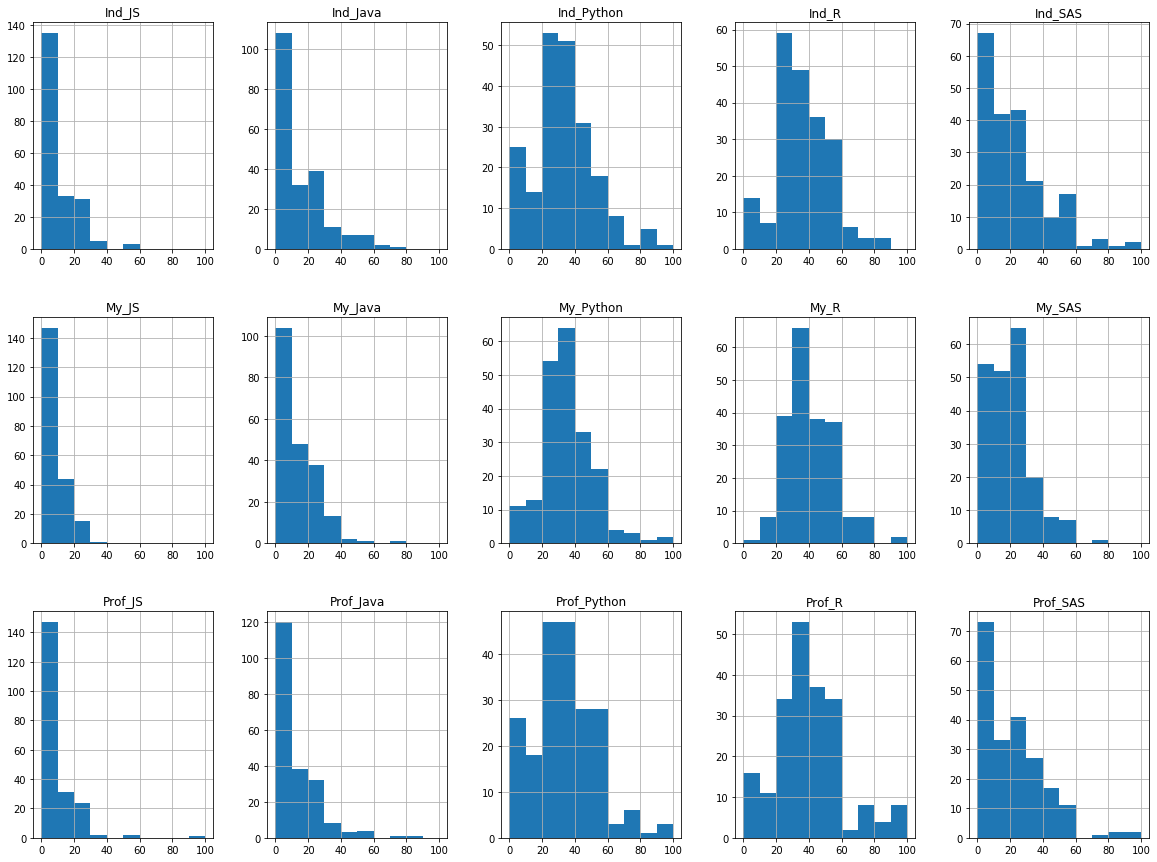

In [80]:
# histograms for software preference variables

hist = software_df.hist(layout=(3,5), bins=10, range=(0,100), figsize=(20,15))


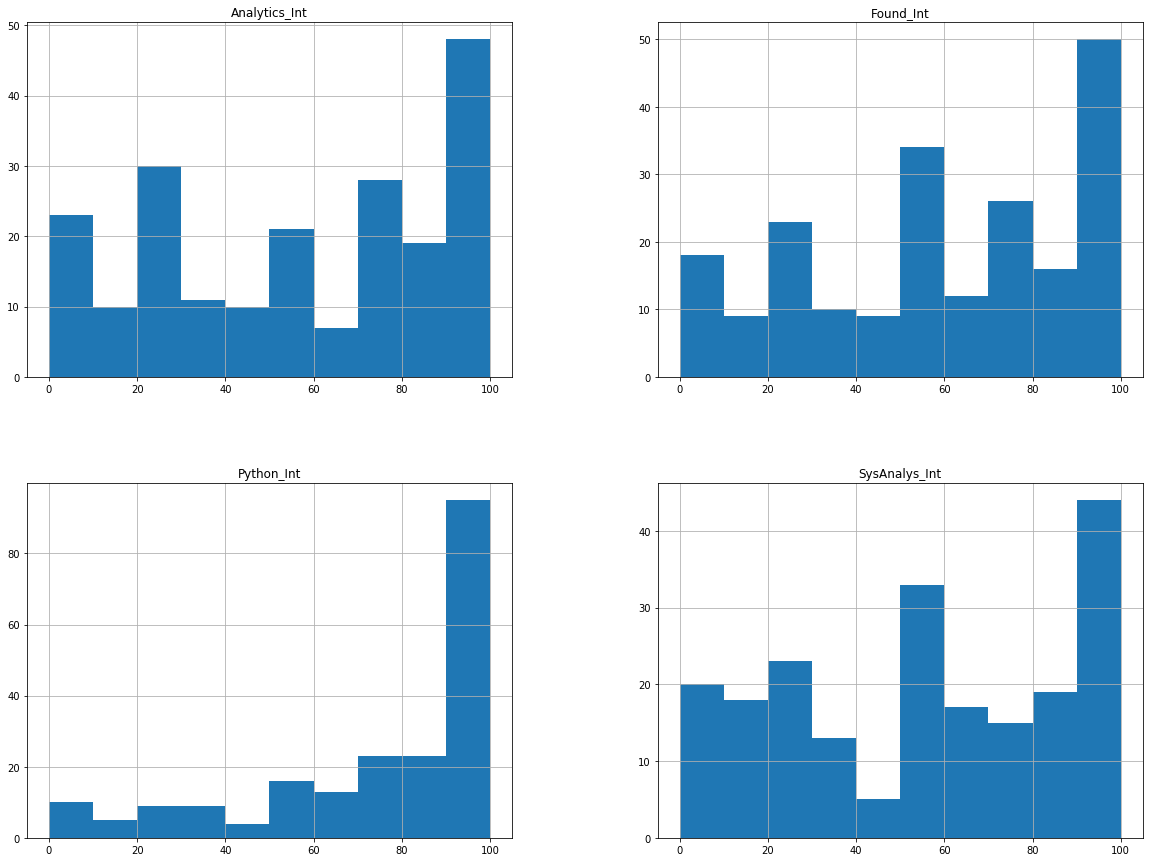

In [81]:
# histograms for courses interest variables

hist = coursesint_df.hist(layout=(2,2), bins=10, range=(0,100), figsize=(20,15))


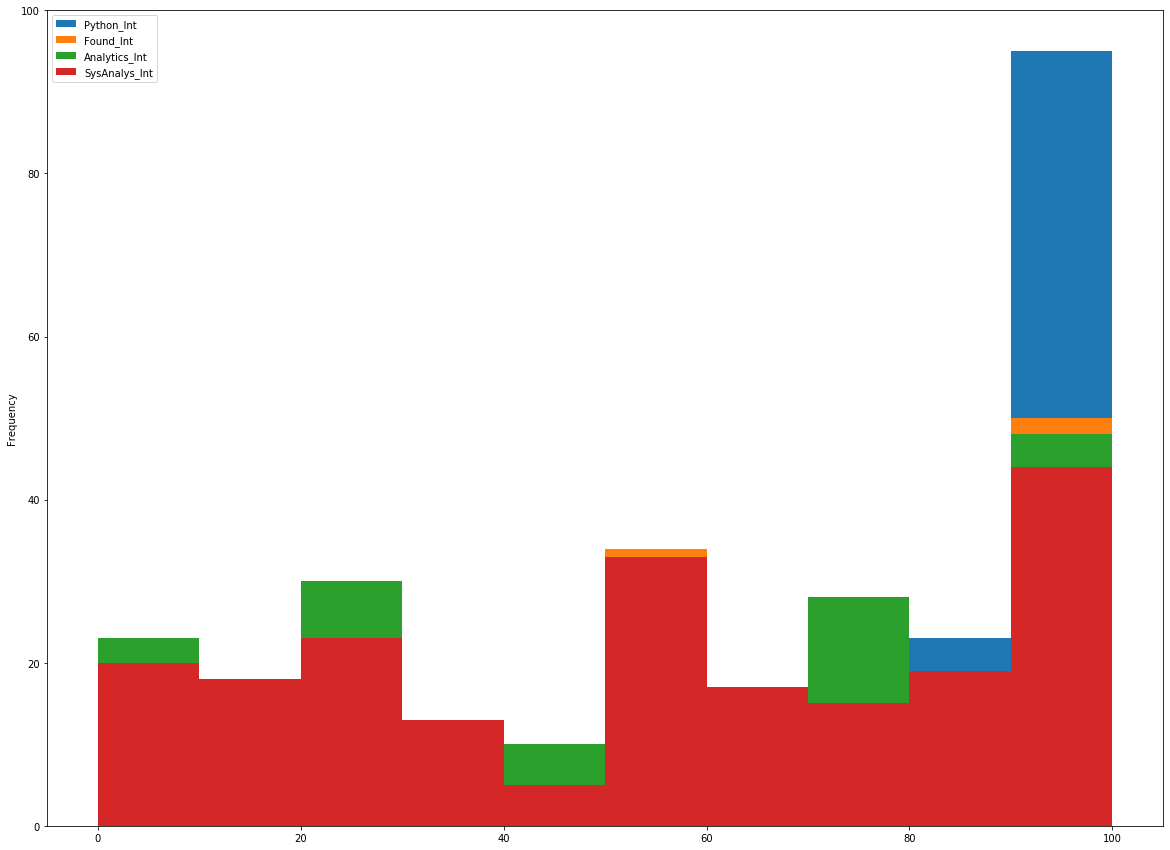

In [82]:
# with this version the bars are overimposed (same scale for y) and we can see that there is a
# preponderance of the courses in Python language

hist = coursesint_df.plot.hist(layout=(2,2), bins=10, range=(0,100), figsize=(20,15), ylim=(0,100))



In [83]:
# create new counters columns

coursesdone_df = coursesdone_df.assign(Py_Courses = 0)
coursesdone_df = coursesdone_df.assign(R_Courses = 0)
coursesdone_df = coursesdone_df.assign(SAS_Courses = 0)

# calculate number of courses by language and student
for i in range(len(coursesdone_df)): 
    if coursesdone_df.PREDICT400[i] != ' ':
        coursesdone_df.Py_Courses[i] = coursesdone_df.Py_Courses[i] + 1
    if coursesdone_df.PREDICT420[i] != ' ':
        coursesdone_df.Py_Courses[i] = coursesdone_df.Py_Courses[i] + 1
    if coursesdone_df.PREDICT452[i] != ' ':
        coursesdone_df.Py_Courses[i] = coursesdone_df.Py_Courses[i] + 1
    if coursesdone_df.PREDICT453[i] != ' ':
        coursesdone_df.Py_Courses[i] = coursesdone_df.Py_Courses[i] + 1
    if coursesdone_df.OtherPython[i] != ' ':
        coursesdone_df.Py_Courses[i] = coursesdone_df.Py_Courses[i] + 1   
  
    
    if coursesdone_df.PREDICT401[i] != ' ':
        coursesdone_df.R_Courses[i] = coursesdone_df.R_Courses[i] + 1
    if coursesdone_df.PREDICT413[i] != ' ':
        coursesdone_df.R_Courses[i] = coursesdone_df.R_Courses[i] + 1
    if coursesdone_df.PREDICT422[i] != ' ':
        coursesdone_df.R_Courses[i] = coursesdone_df.R_Courses[i] + 1
    if coursesdone_df.PREDICT450[i] != ' ':
        coursesdone_df.R_Courses[i] = coursesdone_df.R_Courses[i] + 1       
    if coursesdone_df.PREDICT451[i] != ' ':
        coursesdone_df.R_Courses[i] = coursesdone_df.R_Courses[i] + 1
    if coursesdone_df.PREDICT454[i] != ' ':
        coursesdone_df.R_Courses[i] = coursesdone_df.R_Courses[i] + 1
    if coursesdone_df.PREDICT455[i] != ' ':
        coursesdone_df.R_Courses[i] = coursesdone_df.R_Courses[i] + 1
    if coursesdone_df.PREDICT456[i] != ' ':
        coursesdone_df.R_Courses[i] = coursesdone_df.R_Courses[i] + 1
    if coursesdone_df.PREDICT457[i] != ' ':
        coursesdone_df.R_Courses[i] = coursesdone_df.R_Courses[i] + 1 
    if coursesdone_df.OtherR[i] != ' ':
        coursesdone_df.R_Courses[i] = coursesdone_df.R_Courses[i] + 1
  
    if coursesdone_df.PREDICT410[i] != ' ':
        coursesdone_df.SAS_Courses[i] = coursesdone_df.SAS_Courses[i] + 1      
    if coursesdone_df.PREDICT411[i] != ' ':
        coursesdone_df.SAS_Courses[i] = coursesdone_df.SAS_Courses[i] + 1           
    if coursesdone_df.OtherSAS[i] != ' ':
        coursesdone_df.SAS_Courses[i] = coursesdone_df.SAS_Courses[i] + 1          


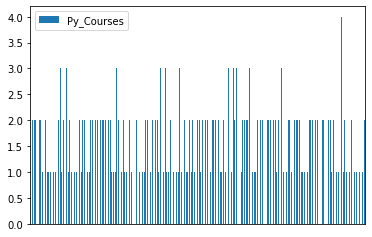

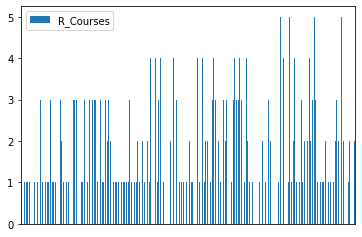

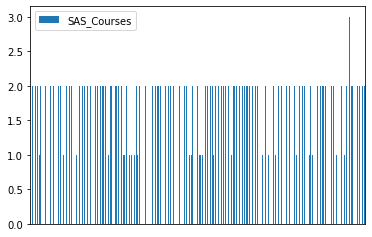

In [84]:
# bar plots of number of courses with python by student
        
coursesdone_df.plot(kind='bar',y='Py_Courses')
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()
plt.close()



# bar plots of number of courses with R by student
        
coursesdone_df.plot(kind='bar',y='R_Courses')
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()
plt.close()

# bar plots of number of courses with SAS by student
        
coursesdone_df.plot(kind='bar',y='SAS_Courses')
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()
plt.close()

## Correlation

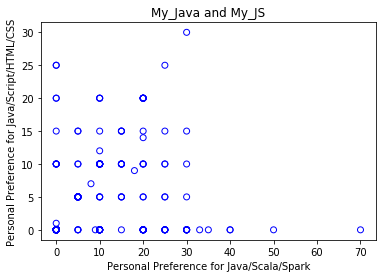

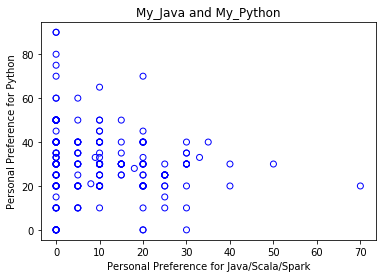

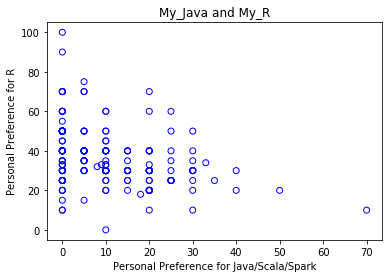

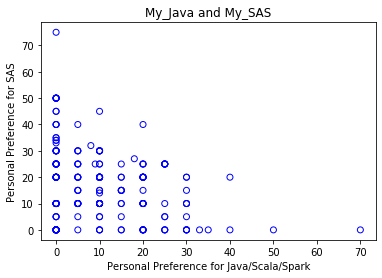

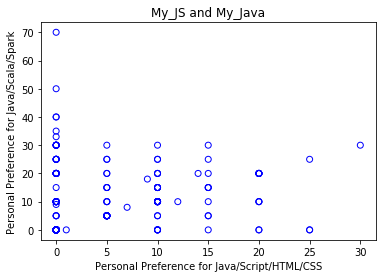

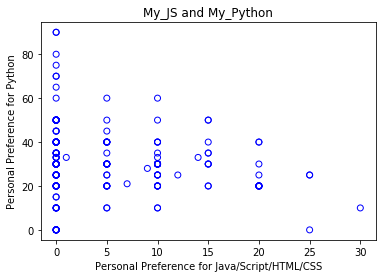

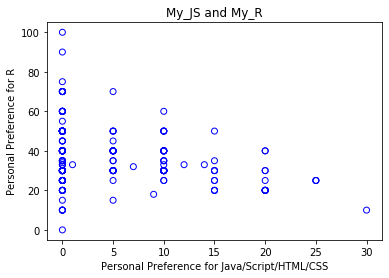

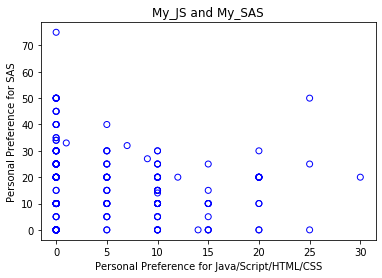

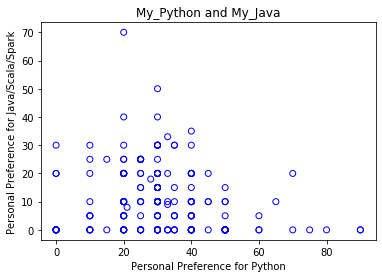

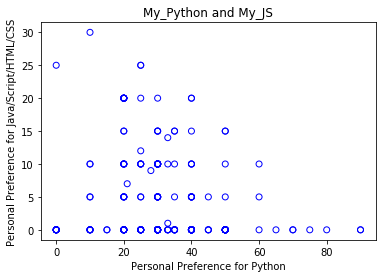

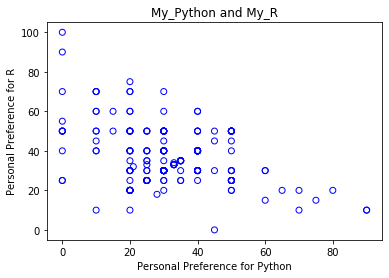

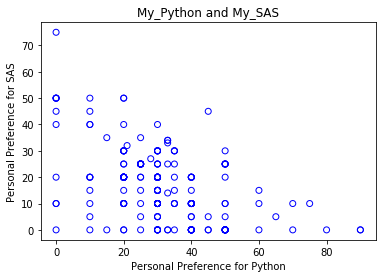

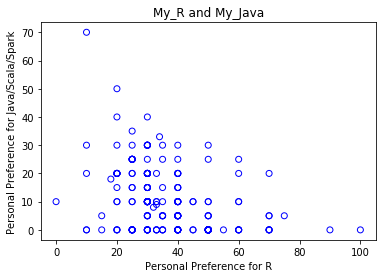

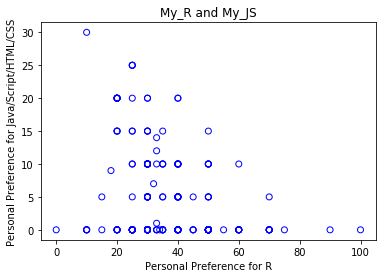

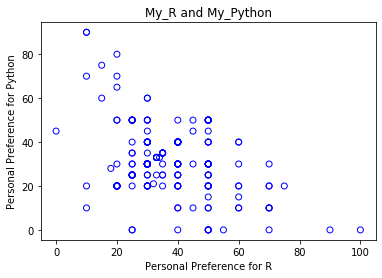

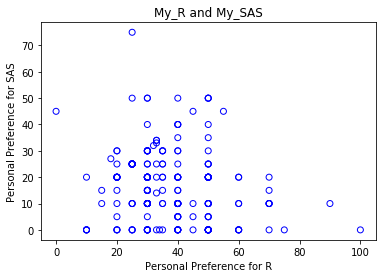

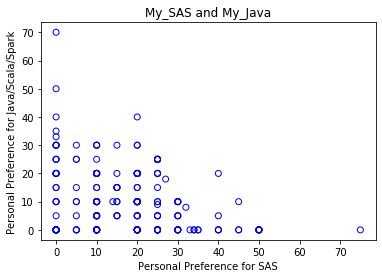

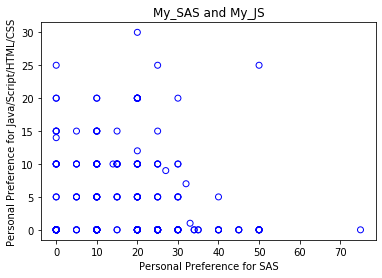

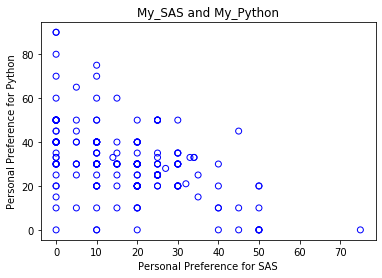

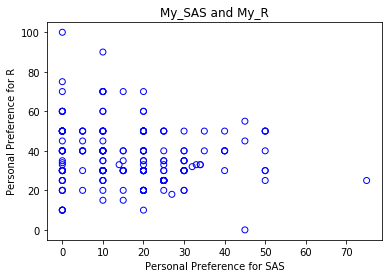

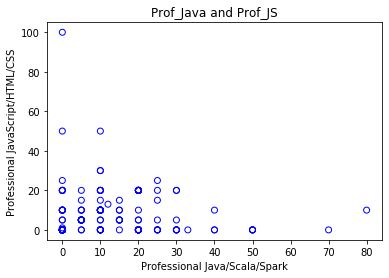

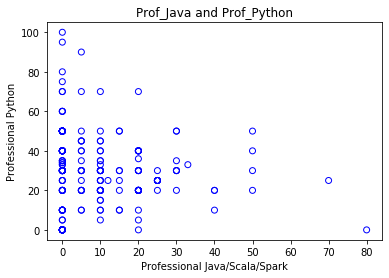

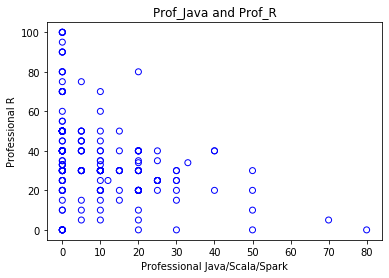

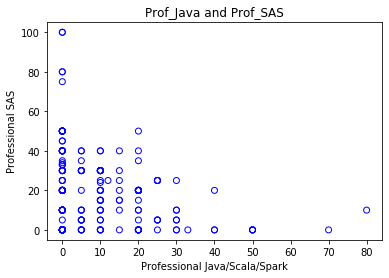

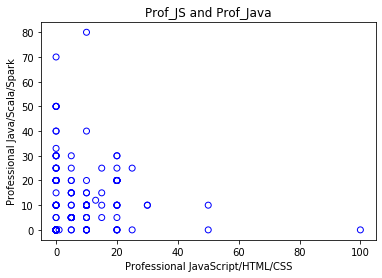

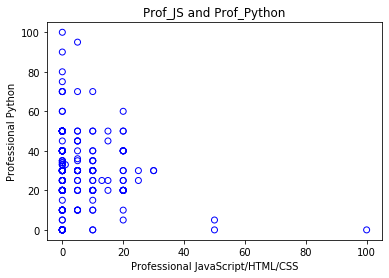

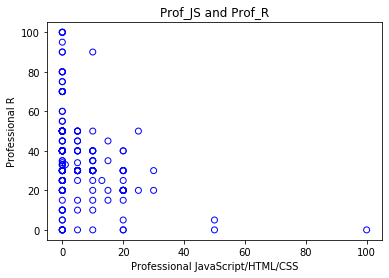

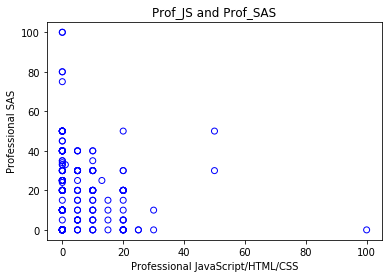

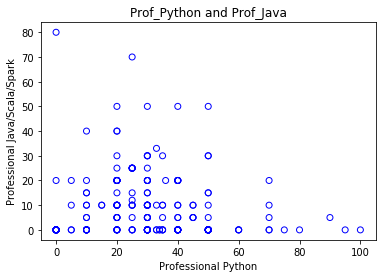

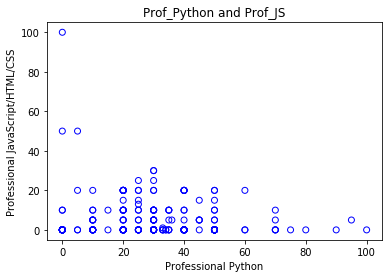

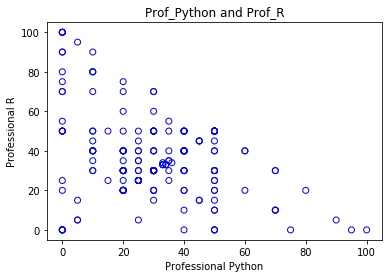

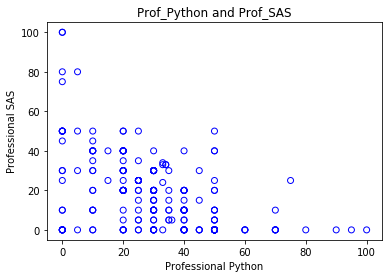

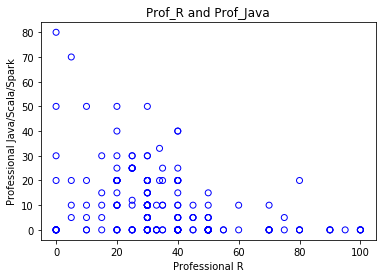

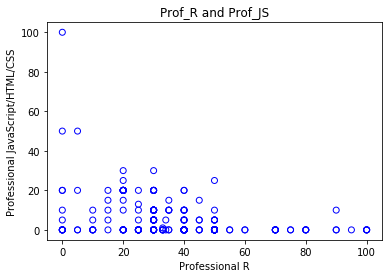

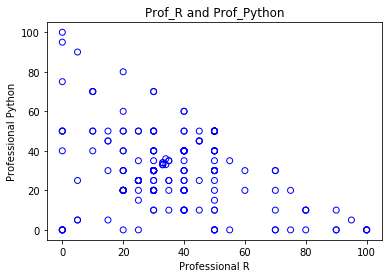

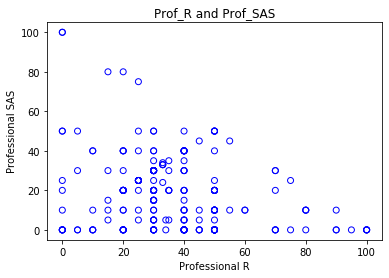

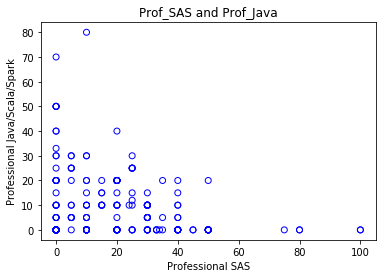

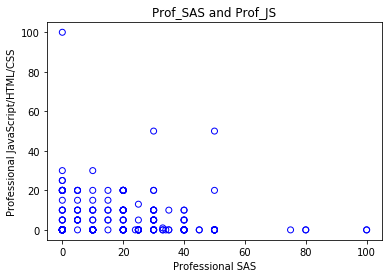

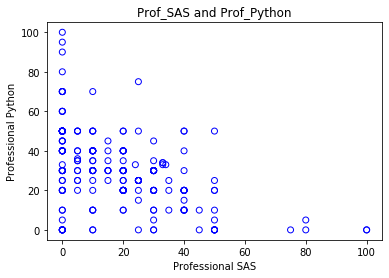

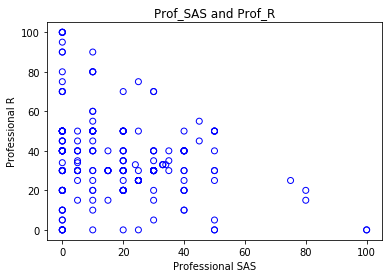

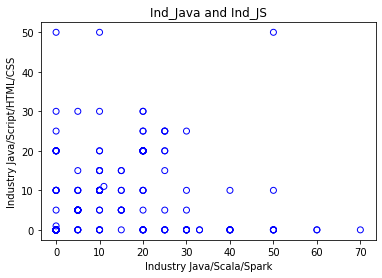

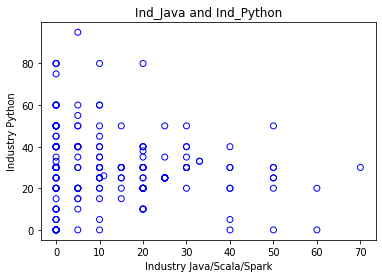

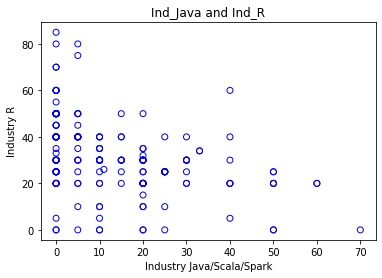

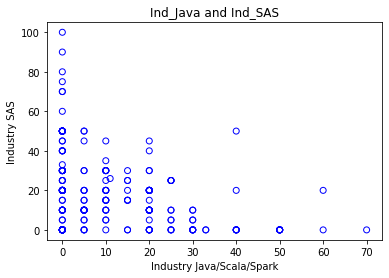

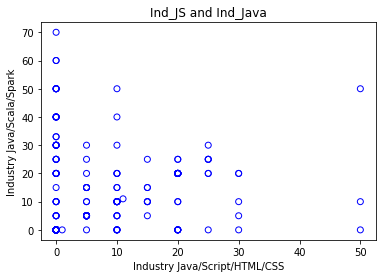

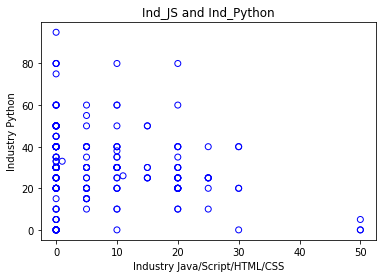

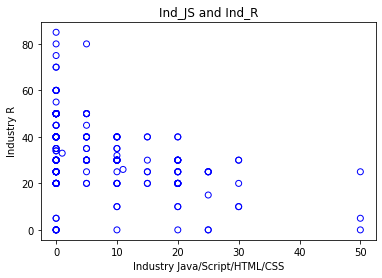

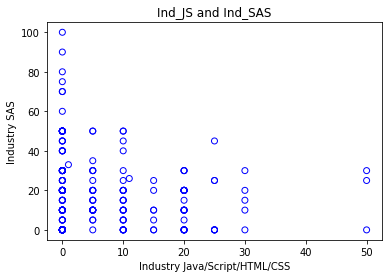

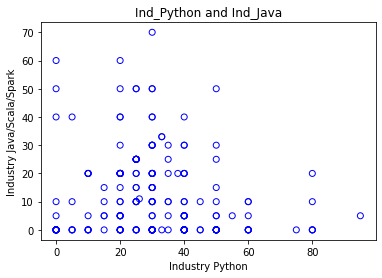

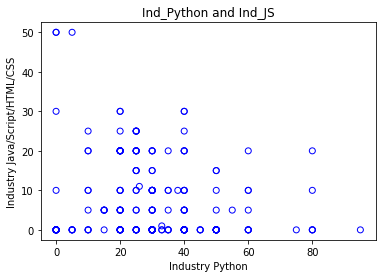

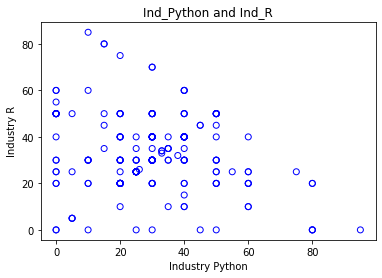

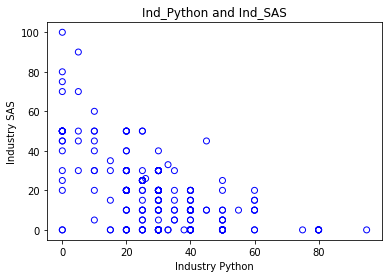

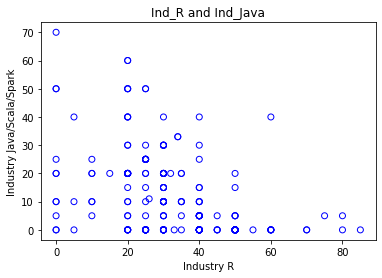

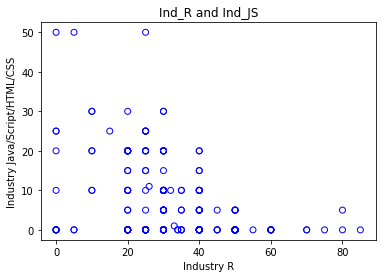

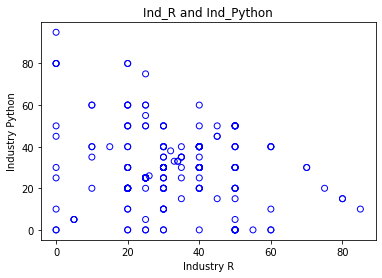

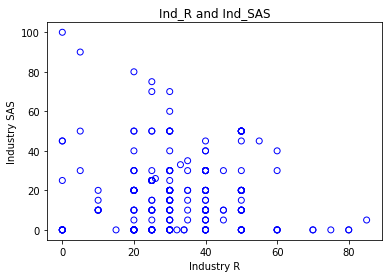

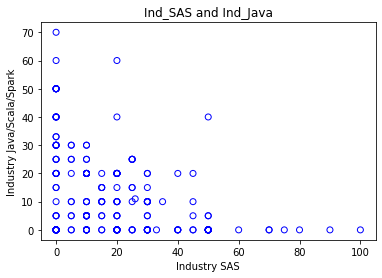

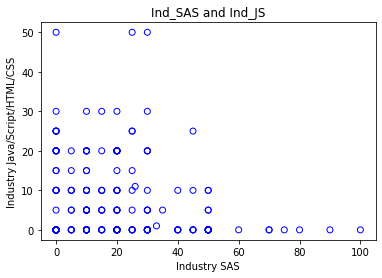

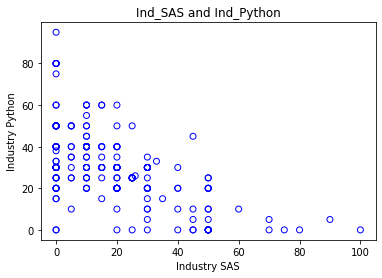

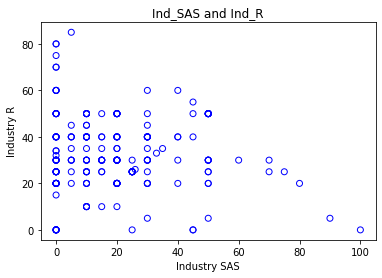

In [85]:
survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]    

# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue')  

# create a set of scatter plots for professinal preferences
for i in range(5,10):
    for j in range(5,10):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 

# create a set of scatter plots for Industry preferences
for i in range(10,15):
    for j in range(10,15):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            

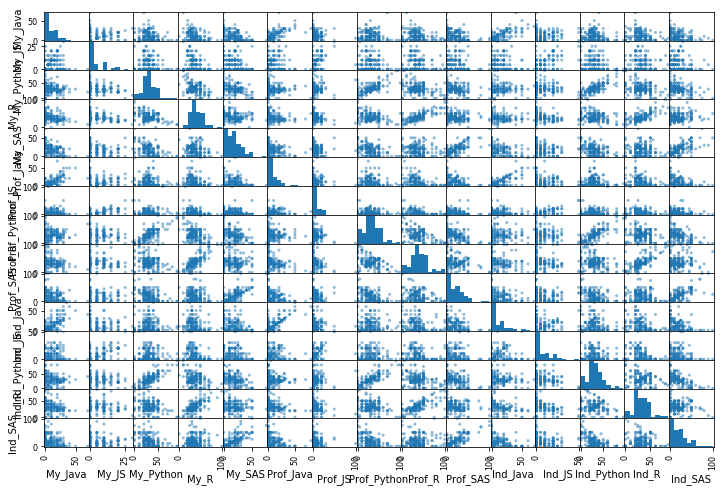

In [86]:
#  examine intercorrelations among course preference variables
#  with scatter matrix

scatter_matrix( software_df, figsize=(12, 8))
plt.show()

<Figure size 432x288 with 0 Axes>

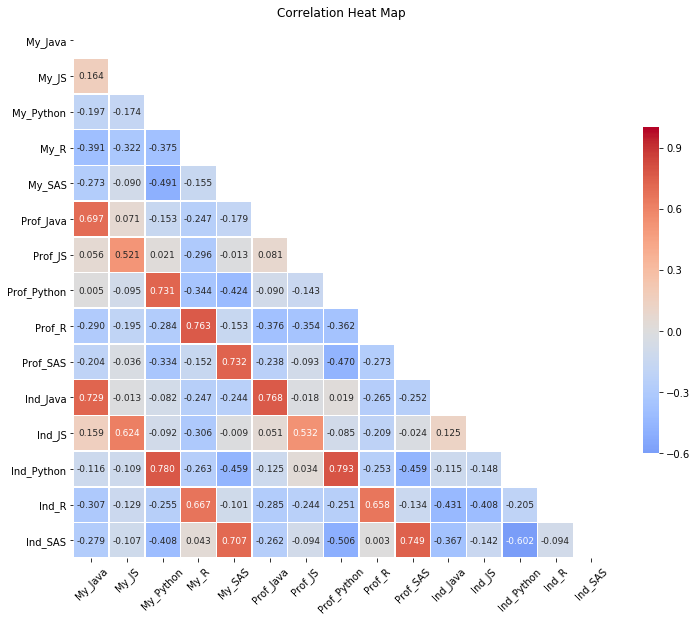

In [87]:
# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 


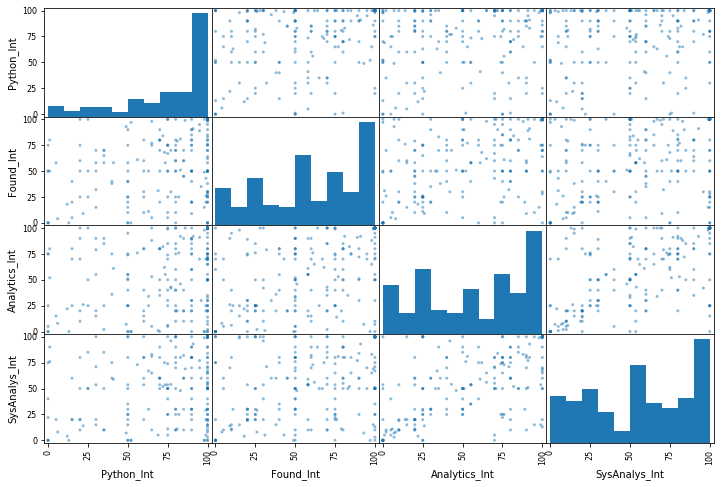

In [88]:
#  examine intercorrelations among course preference variables
#  with scatter matrix

scatter_matrix( coursesint_df, figsize=(12, 8))
plt.show()

In [89]:
mycorr=software_df.corr()# get the correlation matrix
print(mycorr) #print to verify

              My_Java     My_JS  My_Python      My_R    My_SAS  Prof_Java  \
My_Java      1.000000  0.164302  -0.197282 -0.391172 -0.273014   0.697135   
My_JS        0.164302  1.000000  -0.173517 -0.321997 -0.090473   0.071114   
My_Python   -0.197282 -0.173517   1.000000 -0.374659 -0.491077  -0.152992   
My_R        -0.391172 -0.321997  -0.374659  1.000000 -0.155090  -0.247095   
My_SAS      -0.273014 -0.090473  -0.491077 -0.155090  1.000000  -0.178513   
Prof_Java    0.697135  0.071114  -0.152992 -0.247095 -0.178513   1.000000   
Prof_JS      0.056456  0.521275   0.020761 -0.296240 -0.012519   0.080851   
Prof_Python  0.004771 -0.094958   0.730511 -0.344084 -0.423590  -0.089861   
Prof_R      -0.290046 -0.195457  -0.283518  0.763444 -0.153432  -0.376284   
Prof_SAS    -0.203620 -0.036105  -0.333732 -0.152498  0.732492  -0.237721   
Ind_Java     0.728855 -0.013112  -0.081856 -0.247213 -0.244404   0.767964   
Ind_JS       0.158573  0.624014  -0.092460 -0.306092 -0.008862   0.050527   

(15.0, 0.0)

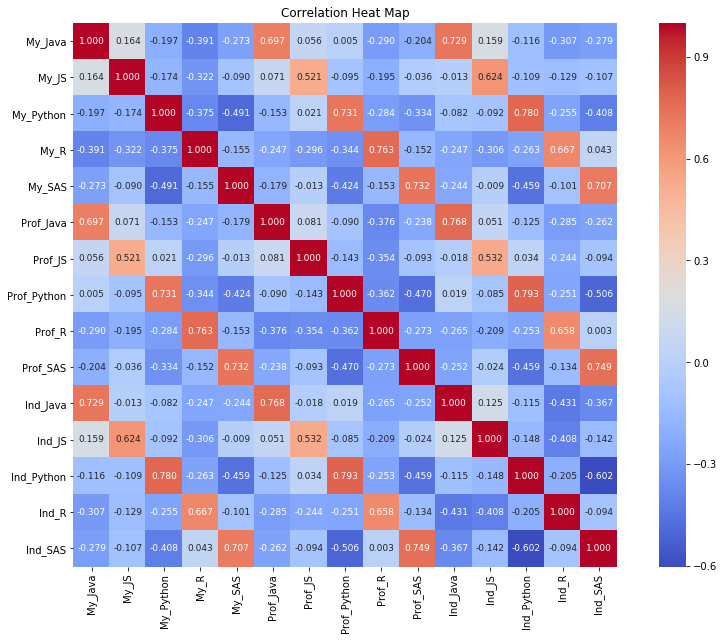

In [90]:
plt.subplots(figsize=(15,10))
ax = sns.heatmap(mycorr, cmap="coolwarm", square=1, annot = True, annot_kws={'size': 9}, fmt = '.3f')
plt.title('Correlation Heat Map') 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#ax = sns.heatmap(mycorr, annot=True) #notation: "annot" not "annote"
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

<Figure size 432x288 with 0 Axes>

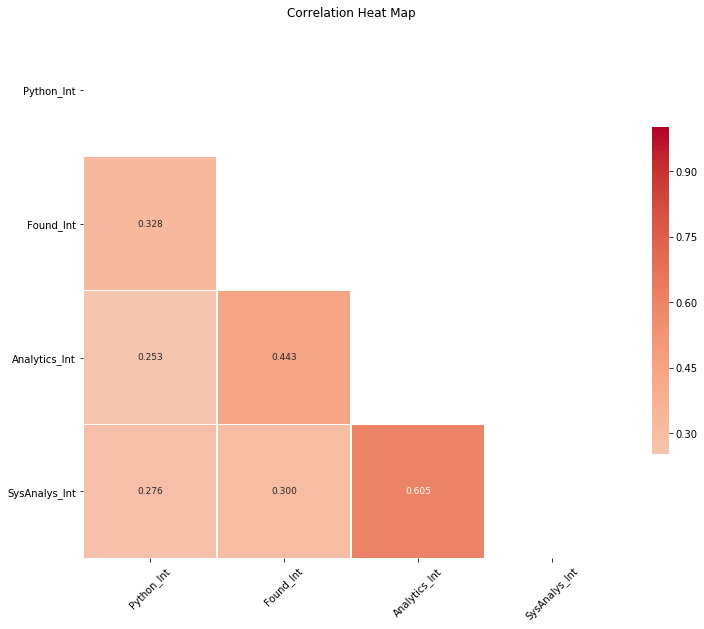

In [91]:
# examine intercorrelations among course ineterest variables
# with correlation matrix/heat map
corr_chart(df_corr = coursesint_df) 

# Scaling

Text(0.5, 1.0, 'MinMaxScaler')

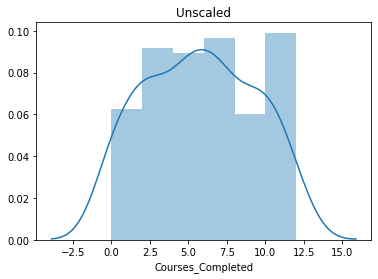

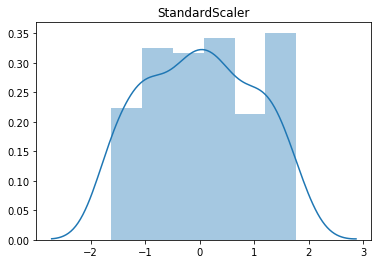

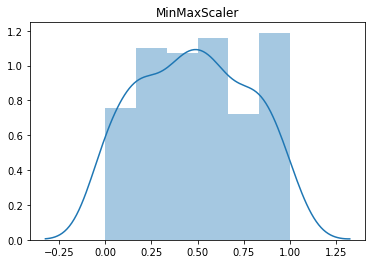

In [92]:
# X has been created already
X1 = X.values.reshape(-1,1)

# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')


standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X1)).set_title('StandardScaler')


minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X1)).set_title('MinMaxScaler')

 

# Conclusions